### Currently on ventilator/Now on ventilator
- API field name: onVentilatorCurrently
- Individuals who are currently hospitalized under advanced ventilation with COVID-19.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame

dc = pd.read_csv('dc_covid.csv')
dc.head()

,Unnamed: 0,date,state,death,hospitalizedCurrently,inIcuCurrently,negative,negativeIncrease,onVentilatorCurrently,positive,positiveIncrease,recovered,totalTestEncountersViral,totalTestsPeopleViral,totalTestsPeopleViralIncrease
0,8,2020-12-02,DC,690.0,165.0,41.0,679643.0,3919,18.0,21842.0,157,16070.0,701485.0,308164.0,828
1,64,2020-12-01,DC,685.0,160.0,43.0,675724.0,2020,18.0,21685.0,133,15914.0,697409.0,307336.0,889
2,120,2020-11-30,DC,680.0,158.0,43.0,673704.0,4810,17.0,21552.0,104,15746.0,695256.0,306447.0,884
3,176,2020-11-29,DC,680.0,145.0,42.0,668894.0,4864,21.0,21448.0,140,15671.0,690342.0,305563.0,1530
4,232,2020-11-28,DC,678.0,157.0,41.0,664030.0,12528,16.0,21308.0,371,15603.0,685338.0,304033.0,4071


In [3]:
# Use Pandas get_dummies to convert categorical data

### BEGIN SOLUTION
#dc = pd.get_dummies(dc)
#dc.head()
### END SOLUTION

In [4]:
dc.columns

Index(['Unnamed: 0', 'date', 'state', 'death', 'hospitalizedCurrently',
       'inIcuCurrently', 'negative', 'negativeIncrease',
       'onVentilatorCurrently', 'positive', 'positiveIncrease', 'recovered',
       'totalTestEncountersViral', 'totalTestsPeopleViral',
       'totalTestsPeopleViralIncrease'],
      dtype='object')

In [5]:
# Drop extra dummy columns

### BEGIN SOLUTION
dc = dc.drop(columns=['Unnamed: 0','state'])
dc.head()
### END SOLUTION

,date,death,hospitalizedCurrently,inIcuCurrently,negative,negativeIncrease,onVentilatorCurrently,positive,positiveIncrease,recovered,totalTestEncountersViral,totalTestsPeopleViral,totalTestsPeopleViralIncrease
0,2020-12-02,690.0,165.0,41.0,679643.0,3919,18.0,21842.0,157,16070.0,701485.0,308164.0,828
1,2020-12-01,685.0,160.0,43.0,675724.0,2020,18.0,21685.0,133,15914.0,697409.0,307336.0,889
2,2020-11-30,680.0,158.0,43.0,673704.0,4810,17.0,21552.0,104,15746.0,695256.0,306447.0,884
3,2020-11-29,680.0,145.0,42.0,668894.0,4864,21.0,21448.0,140,15671.0,690342.0,305563.0,1530
4,2020-11-28,678.0,157.0,41.0,664030.0,12528,16.0,21308.0,371,15603.0,685338.0,304033.0,4071


In [6]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
X = dc[['death', 'hospitalizedCurrently',\
       'inIcuCurrently', 'negative', 'negativeIncrease',\
       'totalTestEncountersViral', 'positive', 'positiveIncrease', 'recovered',\
       'totalTestsPeopleViral',\
       'totalTestsPeopleViralIncrease']]
y = dc['onVentilatorCurrently'].values.reshape(-1, 1)
print(X.shape, y.shape)
### END SOLUTION

(257, 11) (257, 1)


In [7]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [8]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [9]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [10]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression()

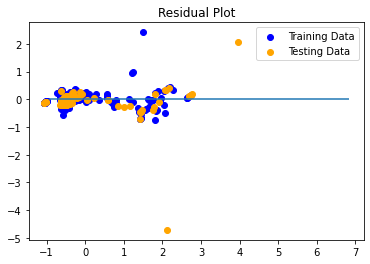

In [11]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [12]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.45229250409857835, R2: 0.7573948926596082


In [13]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.37539269589293794, R2: 0.7986431690628775


In [14]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.38665232388372417, R2: 0.7926036189209582


In [15]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.37677295054138915, R2: 0.7979028144823568
